<a href="https://colab.research.google.com/github/UTExDrake/AI_Basic/blob/main/Week12/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 50
classes = 100
loss = losses

In [ ]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

In [ ]:
# ANN model
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
# Add Dropout to cancel learning
# model.add(Dropout(0.25))
model.add(Dense(classes, activation='softmax'))

In [ ]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
# Augment data with ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
782/782 [==============================] - 14s 6ms/step - loss: 3.9534 - accuracy: 0.0952 - val_loss: 3.5032 - val_accuracy: 0.1731
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 3.3270 - accuracy: 0.1983 - val_loss: 3.1910 - val_accuracy: 0.2288
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 3.0241 - accuracy: 0.2575 - val_loss: 2.9649 - val_accuracy: 0.2750
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 2.8295 - accuracy: 0.2919 - val_loss: 2.9036 - val_accuracy: 0.2835
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 2.6834 - accuracy: 0.3230 - val_loss: 2.7600 - val_accuracy: 0.3106
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 2.5559 - accuracy: 0.3487 - val_loss: 2.6674 - val_accuracy: 0.3297
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 2.4476 - accuracy: 0.3718 - val_loss: 2.5918 - val_accuracy: 0.3458
Epoch

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.5421 - accuracy: 0.3723
Test accuracy: 0.37229999899864197


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Backup_AI/cifar100_CNN.h5')

<Axes: >

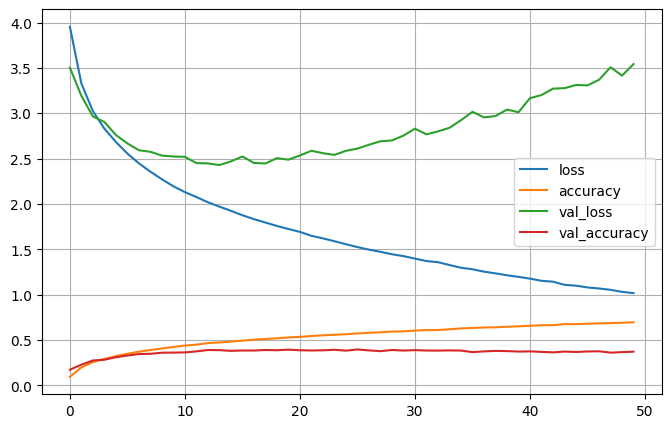

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(train.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca()

1/1 [==============================] - 0s 198ms/step


array([95])

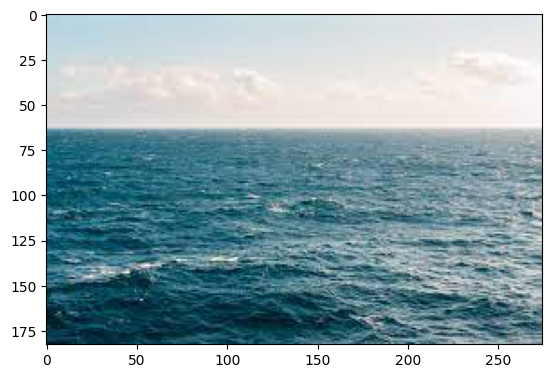

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

img1 = load_img('Sea.jpg')
plt.imshow(img1)

img = load_img('Sea.jpg', target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)